# Graphical Analysis

In [8]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [1]:
import os
import sys
from pathlib import Path
import pandas as pd
import sqlalchemy as db
import sqlite3
import matplotlib.pyplot as plt

Append path directory to data

In [2]:
#setting paths at runtime in jupyter notebook does not work - we'll need a variable therefore 
path = os.path.join(Path(os.getcwd()).parent, 'data', '') 

### Database settings

In [3]:
# SQLite
database_path = os.path.join(path, 'dtff_database.sqlite3')
engine = db.create_engine('sqlite:///' + database_path)
sqlite_db_con = sqlite3.connect(database_path)

In [5]:
# Read data in
tot_returns_cum_noTC_and_TC = pd.read_sql('SELECT * FROM with_NS_F_2_B_0_LB_12_0', sqlite_db_con)
tot_returns_cum_noTC = tot_returns_cum_noTC_and_TC[['date', 'Single', 'Complete', 'Average', 'Ward', 'BM Ivp', 'BM Eq']]
tot_returns_cum_TC = tot_returns_cum_noTC_and_TC[['date', 'Single TC', 'Complete TC', 'Average TC', 'Ward TC', 'BM Ivp TC', 'BM Eq TC']]

## Plots

#### NO TC - Performance no transaction costs

<ipython-input-15-8c0c5e0f779d>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


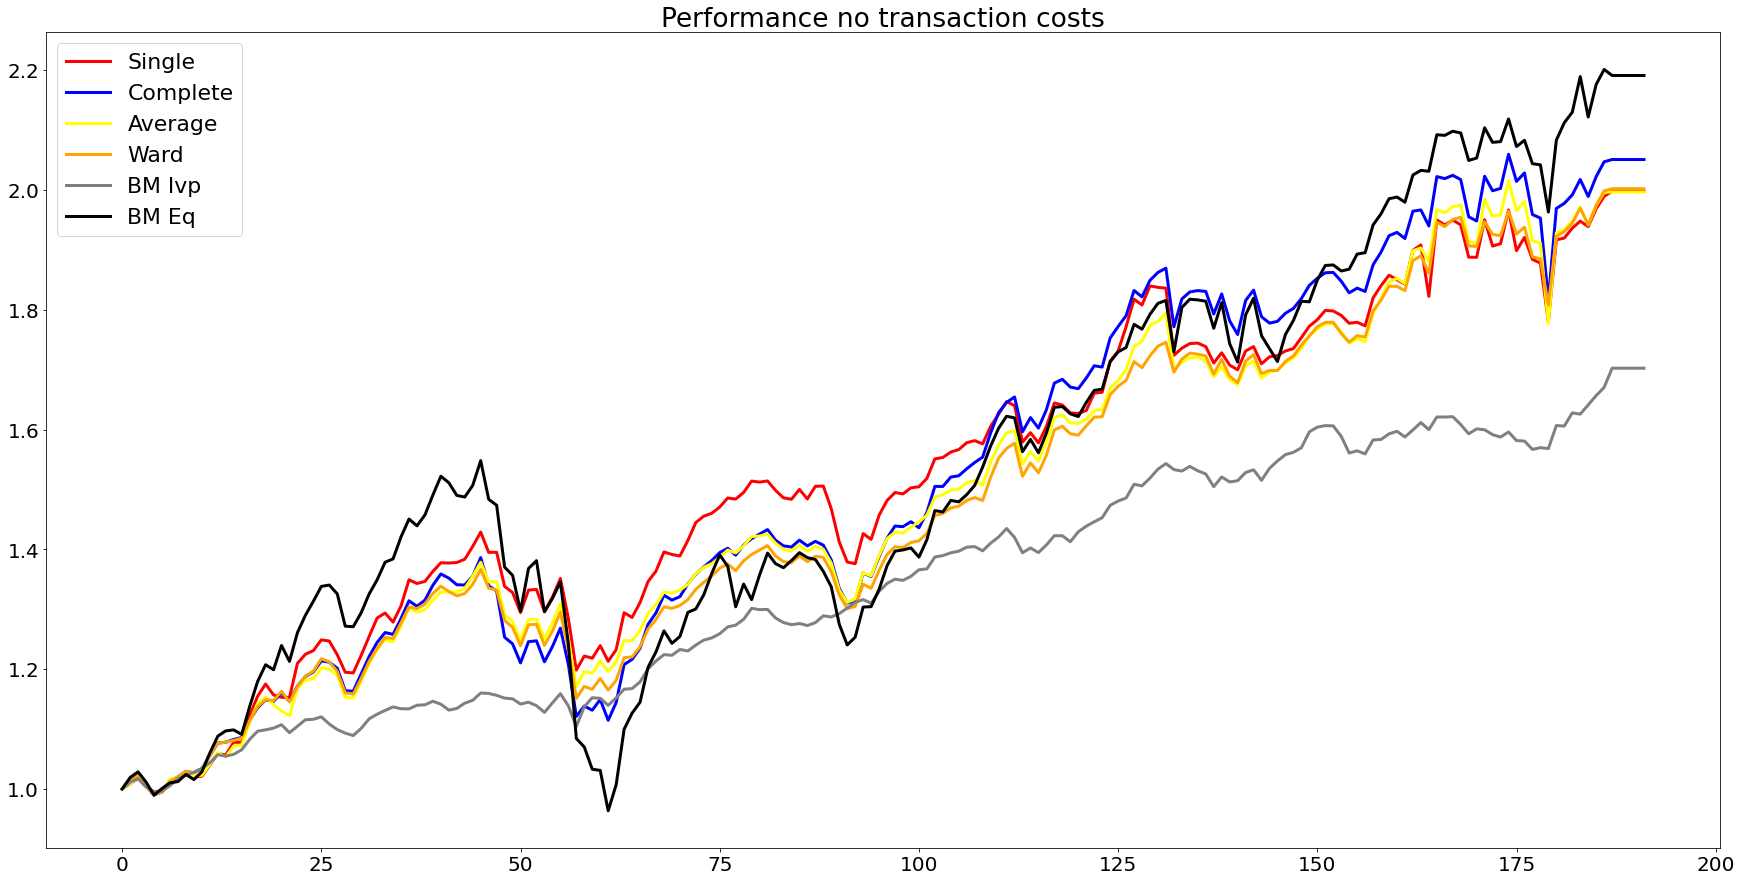

In [15]:
plt.rcParams.update({'font.size': 22})
title_str = 'Performance no transaction costs'
#title_str = title_str + '\n ' + 'Sharpe : {:.3f}'.format(pf_tot_returns_ward_TC.mean() / pf_tot_returns_ward_TC.std() * np.sqrt(12))
plot = tot_returns_cum_noTC.plot(color=['red', 'blue', 'yellow', 'orange', 'grey', 'black'],
                                 style=['-', '-', '-', '-', '-', '-'],
                                 figsize=(30, 15), #title=title_str,
                                 fontsize=20,
                                 linewidth=3,
                                 title=title_str)
fig = plot.get_figure()
fig.show()

#### TC AND NO TC - Effect of transaction costs


<ipython-input-16-9b9a53beb77e>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


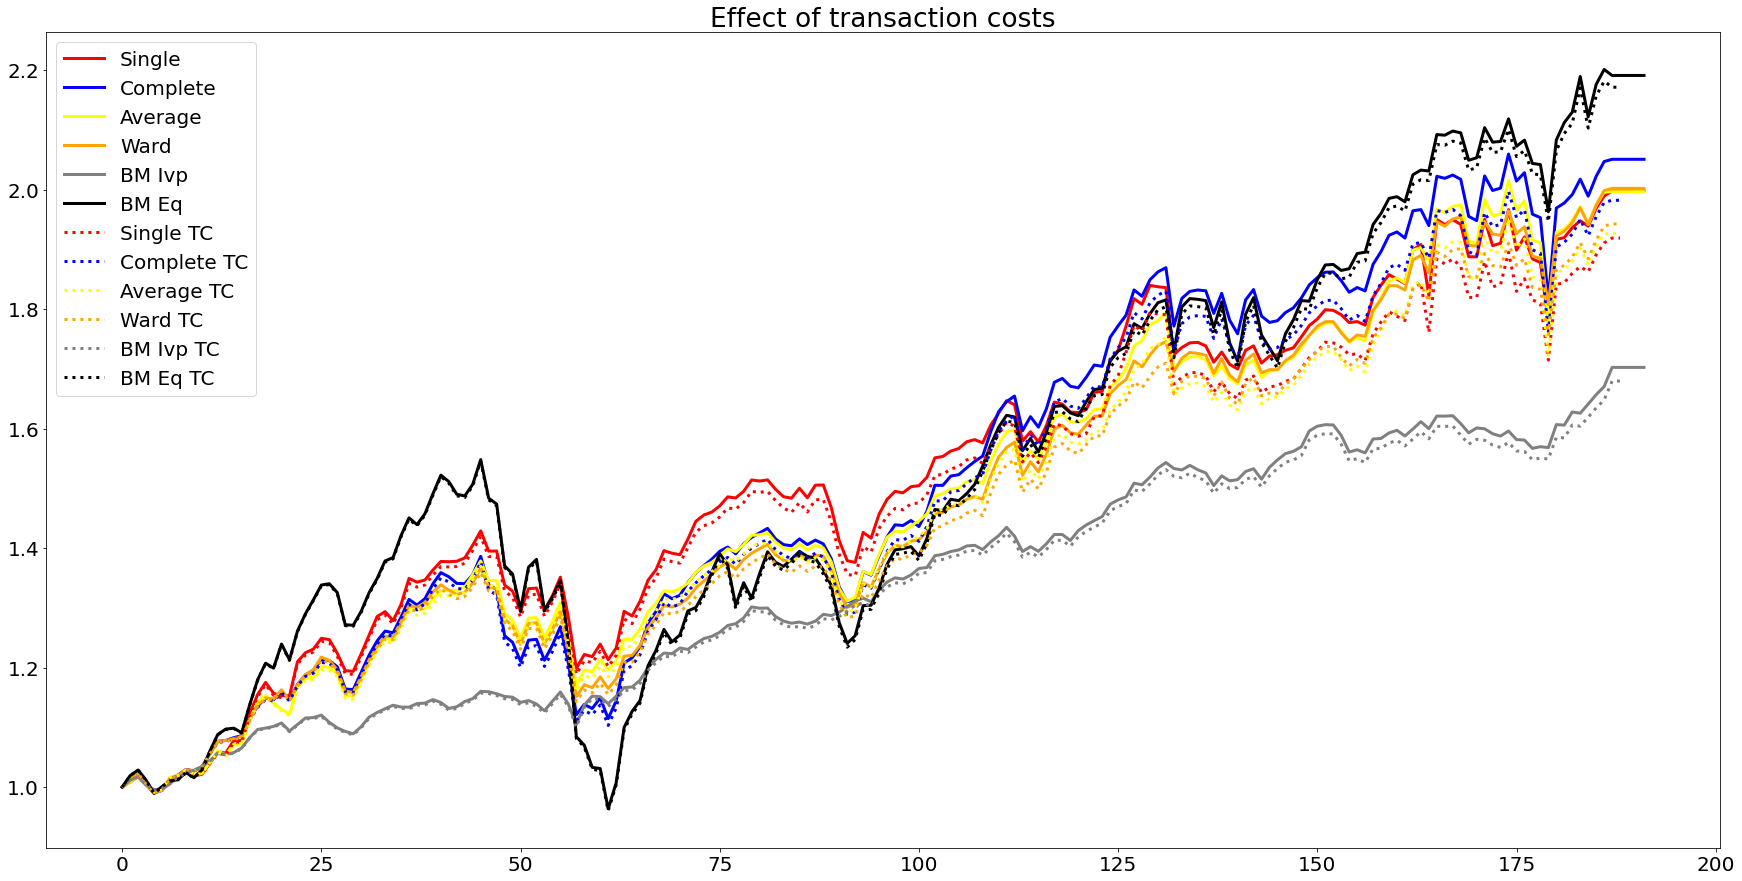

In [16]:
plt.rcParams.update({'font.size': 22})
title_str = 'Effect of transaction costs'
plot = tot_returns_cum_noTC_and_TC.plot(color=['red', 'blue', 'yellow', 'orange', 'grey', 'black', 'red', 'blue', 'yellow', 'orange', 'grey', 'black'],
                     style=['-', '-', '-', '-', '-', '-', ':', ':', ':', ':', ':', ':'],
                     figsize=(30, 15), title=title_str,
                     fontsize=20,  linewidth=3)
plot = plot.legend(loc=2, prop={'size': 20})
fig = plot.get_figure()
fig.show()

#### TC - Performance with transaction costs

<ipython-input-17-28af7c4a1f26>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


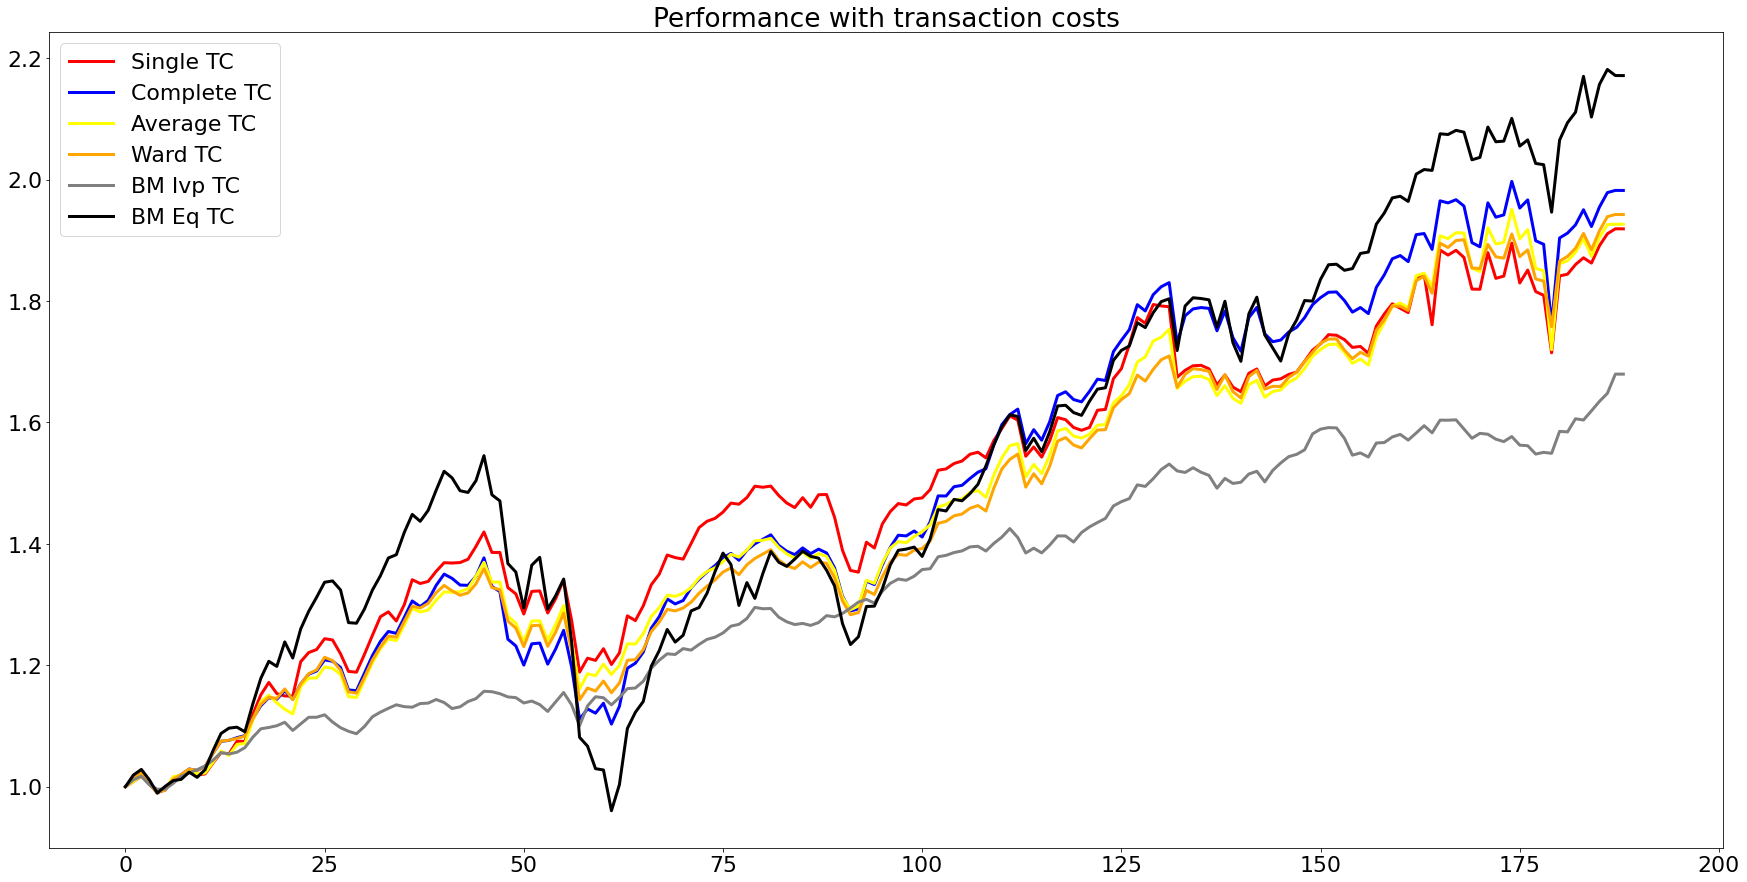

In [17]:
plt.rcParams.update({'font.size': 22})
title_str = 'Performance with transaction costs'
#title_str = title_str + '\n ' + 'Sharpe : {:.3f}'.format(pf_tot_returns_ward.mean() / pf_tot_returns_ward.std() * np.sqrt(12))
plot = tot_returns_cum_TC.plot(color=['red', 'blue', 'yellow', 'orange', 'grey', 'black'],
                                 style=['-', '-', '-', '-', '-', '-'],
                                  figsize=(30, 15), title=title_str,
                                 linewidth=3)
fig.show()